# Compare the performance of models (loss/accuracy, latency)

The models to compare will  be:
* ResNet18
* ResNet50
* VGG16
* MobileNetV3 - small
* MobileNetV3 - large
* EfficientNet

In [1]:
from pathlib import Path
import pandas as pd
from timeit import default_timer as timer

from utils import *
from dataloaders import *
from data_preparation import *
from allResNets import *
from VGGs import *
from MobileNetV3 import *
from engine import *

change_to_disk()
data_dir = Path("split_1k/")
saves = Path('Trainning_results_saves/')
check_dir(saves)

Trainning_results_saves does not exist, creating one...


In [2]:
data_transform = transforms.Compose([
    # Resize our images to 224x224
    transforms.Resize(size=(224, 224)),
    # Flip the images randomly on the horizontal and vertical (just to make it as independent from the position of the pipeline)
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor(),
    
    # Normalize
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

BATCH_SIZE = 32
train_dl, validation_dl, test_dl, train_data, validation_data, test_data, class_names = create_dataloaders(data_dir, data_transform, batch_size = BATCH_SIZE)

In [3]:
# Things to play with
# Hyperparameters -> NUM_EPOCHS - 100 | Learning_rate - 0.001 
# Functions -> Optimizer - Rprop | Loss Function - Cross Entropy Loss

NUM_EPOCHS = 100
lr = 0.001
device = get_device()

resnet18 = ResNet18()
resnet50 = ResNet50()
vgg16 = VGG16()
mobnet_sml = MobileNetV3("small")
mobnet_lrg = MobileNetV3("large")

loss_fn = nn.CrossEntropyLoss()

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.5844 | train_acc: 0.7328 | validation_loss: 6.6353 | validation_acc: 0.3438
Epoch: 2 | train_loss: 0.3592 | train_acc: 0.8465 | validation_loss: 2.1428 | validation_acc: 0.5918
Epoch: 3 | train_loss: 0.3163 | train_acc: 0.8658 | validation_loss: 0.3092 | validation_acc: 0.8672
Epoch: 4 | train_loss: 0.2901 | train_acc: 0.8768 | validation_loss: 0.2921 | validation_acc: 0.8746
Epoch: 5 | train_loss: 0.2656 | train_acc: 0.8918 | validation_loss: 1.2886 | validation_acc: 0.6227
Epoch: 6 | train_loss: 0.2287 | train_acc: 0.9062 | validation_loss: 9.6975 | validation_acc: 0.3066
Epoch: 7 | train_loss: 0.2024 | train_acc: 0.9223 | validation_loss: 0.2933 | validation_acc: 0.8758
Epoch: 8 | train_loss: 0.1696 | train_acc: 0.9340 | validation_loss: 0.2990 | validation_acc: 0.8641
Epoch: 9 | train_loss: 0.1057 | train_acc: 0.9605 | validation_loss: 0.2362 | validation_acc: 0.9098
Epoch: 10 | train_loss: 0.0892 | train_acc: 0.9698 | validation_loss: 0.0377 | validation_a

(None,
 <function utils.plot_confusion_matrix(model, dataloader, device, classes)>)

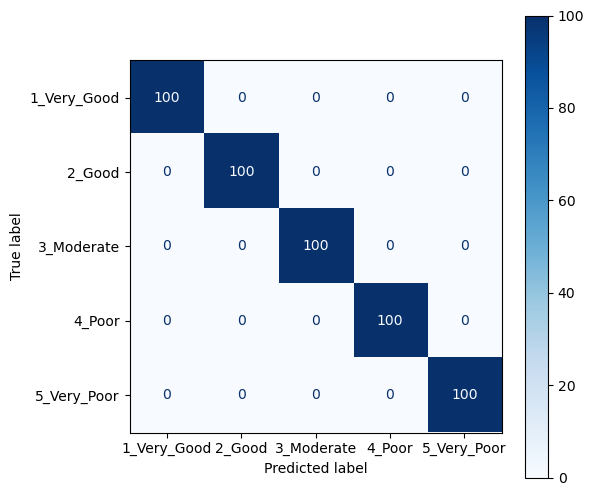

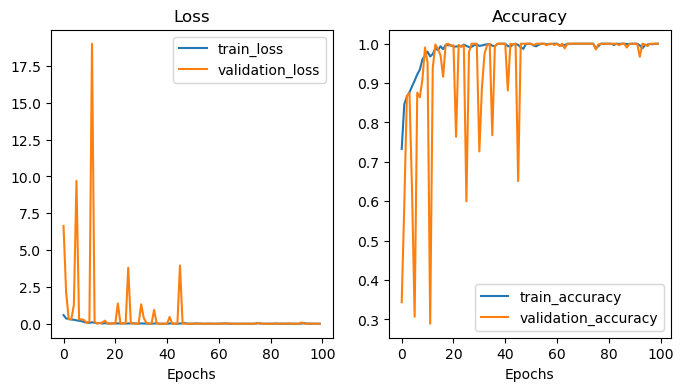

In [4]:
#Train ResNet18
resnet18.to(device)
nadam_optim = torch.optim.NAdam(params=resnet18.parameters(), lr=lr)
train_resnet18_results, train_time_resnet18 = train(resnet18, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

plot_confusion_matrix(resnet18, test_dl, device, class_names)
print(f"ResNet18 Results")
plot_loss_curves(train_resnet18_results), plot_confusion_matrix

In [6]:
results_resnet18 = eval_model(model = resnet18, data_loader = test_dl, loss_fn = loss_fn, accuracy_fn = accuracy_fn, device = device, dummy_input = torch.rand(32,3,224,224).to(device))
models_path = Path('Models/')
model_name_resnet18 = 'ResNet18_1000_class_100_epoch.pth'
save_model(models_path, model_name_resnet18, resnet18)
resnet18_all_results = [results_resnet18, train_resnet18_results, train_time_resnet18]
#resnet18_all_results.append(results_resnet18, train_resnet18_results, train_time_resnet18)
name_results_resnet18 = 'resnet18_results.npy'
pth = saves / name_results_resnet18
np.save(pth,resnet18_all_results)

  0%|          | 0/16 [00:03<?, ?it/s]

Saving the model to: Models\ResNet18_1000_class_100_epoch.pth


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.8325 | train_acc: 0.6458 | validation_loss: 0.4904 | validation_acc: 0.7246
Epoch: 2 | train_loss: 0.4266 | train_acc: 0.8140 | validation_loss: 0.3965 | validation_acc: 0.7734
Epoch: 3 | train_loss: 0.4193 | train_acc: 0.8175 | validation_loss: 2.8012 | validation_acc: 0.4863
Epoch: 4 | train_loss: 0.3966 | train_acc: 0.8297 | validation_loss: 0.3909 | validation_acc: 0.8348
Epoch: 5 | train_loss: 0.3182 | train_acc: 0.8658 | validation_loss: 0.9068 | validation_acc: 0.6988
Epoch: 6 | train_loss: 0.3236 | train_acc: 0.8618 | validation_loss: 1.5916 | validation_acc: 0.5969
Epoch: 7 | train_loss: 0.2871 | train_acc: 0.8732 | validation_loss: 2.0051 | validation_acc: 0.5188
Epoch: 8 | train_loss: 0.2637 | train_acc: 0.8872 | validation_loss: 0.6563 | validation_acc: 0.7797
Epoch: 9 | train_loss: 0.2509 | train_acc: 0.8950 | validation_loss: 1.2591 | validation_acc: 0.6895
Epoch: 10 | train_loss: 0.2571 | train_acc: 0.8928 | validation_loss: 0.2630 | validation_a

(None,
 <function utils.plot_confusion_matrix(model, dataloader, device, classes)>)

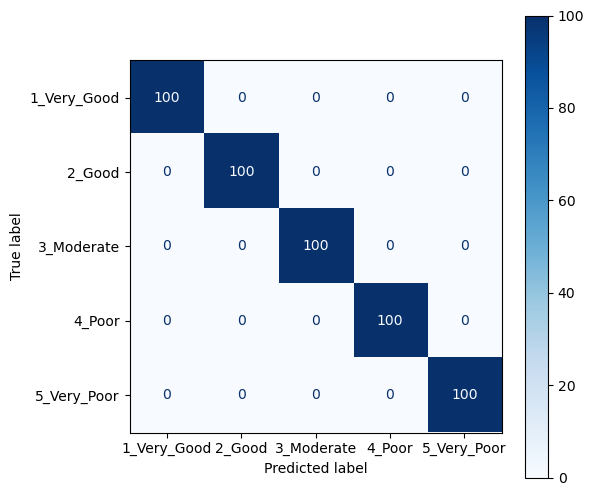

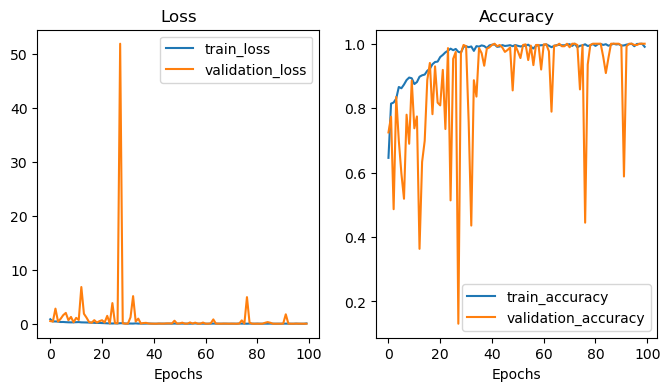

In [7]:
#Train ResNet50
resnet50.to(device)
nadam_optim = torch.optim.NAdam(params=resnet50.parameters(), lr=lr)
train_resnet50_results, train_time_resnet50 = train(resnet50, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

plot_confusion_matrix(resnet50, test_dl, device, class_names)
print(f"ResNet50 Results")
plot_loss_curves(train_resnet50_results), plot_confusion_matrix

In [8]:
results_resnet50 = eval_model(model = resnet50, data_loader = test_dl, loss_fn = loss_fn, accuracy_fn = accuracy_fn, device = device, dummy_input = torch.rand(32,3,224,224).to(device))
model_name_resnet50 = 'ResNet50_1000_class_100_epoch.pth'
save_model(models_path, model_name_resnet50, resnet50)
resnet50_all_results = [results_resnet50, train_resnet50_results, train_time_resnet50]
#resnet50_all_results.append(results_resnet50, train_resnet50_results, train_time_resnet50)
name_results_resnet50 = 'resnet50_results.npy'
pth = saves / name_results_resnet50
np.save(pth,resnet50_all_results)

  0%|          | 0/16 [00:02<?, ?it/s]

Saving the model to: Models\ResNet50_1000_class_100_epoch.pth


In [9]:
# #Train VGG16
# vgg16.to(device)
# nadam_optim = torch.optim.NAdam(params=vgg16.parameters(), lr=lr)
# train_vgg16_results, train_time_vgg16 = train(vgg16, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

# plot_confusion_matrix(vgg16, test_dl, device, class_names)
# print(f"VGG16 Results")
# plot_loss_curves(train_vgg16_results), plot_confusion_matrix

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.7062 | train_acc: 0.6823 | validation_loss: 0.4810 | validation_acc: 0.7852
Epoch: 2 | train_loss: 0.4533 | train_acc: 0.8085 | validation_loss: 0.3301 | validation_acc: 0.8797
Epoch: 3 | train_loss: 0.3508 | train_acc: 0.8465 | validation_loss: 0.5331 | validation_acc: 0.8301
Epoch: 4 | train_loss: 0.3277 | train_acc: 0.8758 | validation_loss: 0.1781 | validation_acc: 0.9305
Epoch: 5 | train_loss: 0.2109 | train_acc: 0.9160 | validation_loss: 0.1089 | validation_acc: 0.9629
Epoch: 6 | train_loss: 0.2173 | train_acc: 0.9343 | validation_loss: 2.3521 | validation_acc: 0.6348
Epoch: 7 | train_loss: 0.1373 | train_acc: 0.9557 | validation_loss: 0.0369 | validation_acc: 0.9824
Epoch: 8 | train_loss: 0.0886 | train_acc: 0.9698 | validation_loss: 0.0541 | validation_acc: 0.9805
Epoch: 9 | train_loss: 0.2258 | train_acc: 0.9435 | validation_loss: 0.5866 | validation_acc: 0.8250
Epoch: 10 | train_loss: 0.1188 | train_acc: 0.9567 | validation_loss: 0.2759 | validation_a

(None,
 <function utils.plot_confusion_matrix(model, dataloader, device, classes)>)

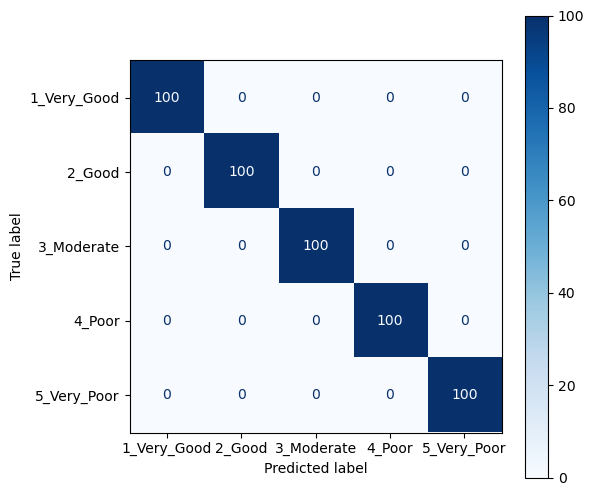

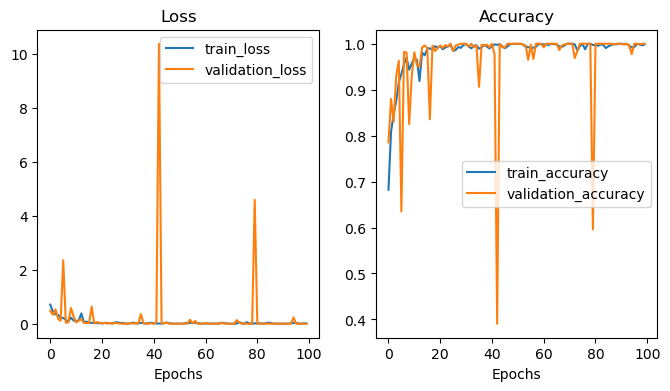

In [10]:
#Train MobileNet Large
mobnet_lrg.to(device)
nadam_optim = torch.optim.NAdam(params=mobnet_lrg.parameters(), lr=lr)
train_mobnet_lrg_results, train_time_mobnet_lrg = train(mobnet_lrg, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

plot_confusion_matrix(mobnet_lrg, test_dl, device, class_names)
print(f"MobileNetV3 (Large) Results")
plot_loss_curves(train_mobnet_lrg_results), plot_confusion_matrix

In [11]:
results_mobnet_lrg = eval_model(model = mobnet_lrg, data_loader = test_dl, loss_fn = loss_fn, accuracy_fn = accuracy_fn, device = device, dummy_input = torch.rand(32,3,224,224).to(device))
model_name_mobnet_lrg = 'MobNet_lrg_1000_class_100_epoch.pth'
save_model(models_path, model_name_mobnet_lrg, mobnet_lrg)
mobnet_lrg_all_results = [results_mobnet_lrg, train_mobnet_lrg_results, train_time_mobnet_lrg]
#mobnet_lrg_all_results.append(results_mobnet_lrg, train_mobnet_lrg_results, train_time_mobnet_lrg)
name_results_mobnet_lrg = 'mobnet_lrg_results.npy'
pth = saves / name_results_mobnet_lrg
np.save(pth,mobnet_lrg_all_results)

  0%|          | 0/16 [00:02<?, ?it/s]

Saving the model to: Models\MobNet_lrg_1000_class_100_epoch.pth


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6201 | train_acc: 0.7055 | validation_loss: 0.7317 | validation_acc: 0.6875
Epoch: 2 | train_loss: 0.3713 | train_acc: 0.8440 | validation_loss: 0.1607 | validation_acc: 0.9336
Epoch: 3 | train_loss: 0.2480 | train_acc: 0.9030 | validation_loss: 0.6224 | validation_acc: 0.7660
Epoch: 4 | train_loss: 0.1881 | train_acc: 0.9347 | validation_loss: 0.2144 | validation_acc: 0.9207
Epoch: 5 | train_loss: 0.1361 | train_acc: 0.9513 | validation_loss: 0.0376 | validation_acc: 0.9902
Epoch: 6 | train_loss: 0.0914 | train_acc: 0.9690 | validation_loss: 0.0831 | validation_acc: 0.9746
Epoch: 7 | train_loss: 0.0982 | train_acc: 0.9692 | validation_loss: 0.0533 | validation_acc: 0.9844
Epoch: 8 | train_loss: 0.0691 | train_acc: 0.9758 | validation_loss: 0.4894 | validation_acc: 0.8555
Epoch: 9 | train_loss: 0.0696 | train_acc: 0.9772 | validation_loss: 0.2194 | validation_acc: 0.9363
Epoch: 10 | train_loss: 0.0620 | train_acc: 0.9780 | validation_loss: 0.0477 | validation_a

(None,
 <function utils.plot_confusion_matrix(model, dataloader, device, classes)>)

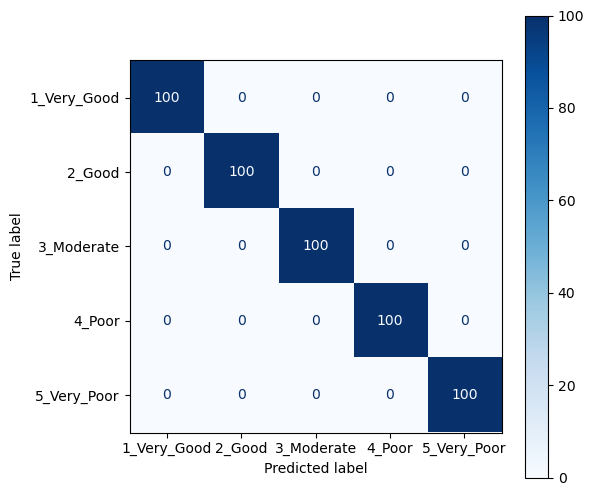

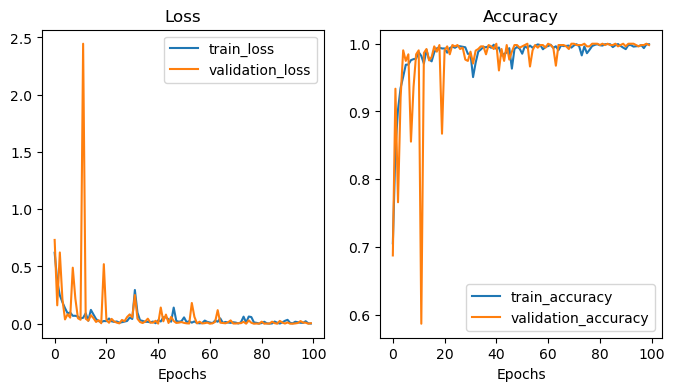

In [12]:
#Train MobileNet Small
mobnet_sml.to(device)
nadam_optim = torch.optim.NAdam(params=mobnet_sml.parameters(), lr=lr)
train_mobnet_sml_results, train_time_mobnet_sml = train(mobnet_sml, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

plot_confusion_matrix(mobnet_sml, test_dl, device, class_names)
print(f"MobileNetV3 (Small) Results")
plot_loss_curves(train_mobnet_sml_results), plot_confusion_matrix

In [13]:
results_mobnet_sml = eval_model(model = mobnet_sml, data_loader = test_dl, loss_fn = loss_fn, accuracy_fn = accuracy_fn, device = device, dummy_input = torch.rand(32,3,224,224).to(device))
model_name_mobnet_sml = 'MobNet_sml_1000_class_100_epoch.pth'
save_model(models_path, model_name_mobnet_sml, mobnet_sml)
mobnet_sml_all_results = [results_mobnet_sml, train_mobnet_sml_results, train_time_mobnet_sml]
#mobnet_sml_all_results.append(results_mobnet_sml, train_mobnet_sml_results, train_time_mobnet_sml)
name_results_mobnet_sml = 'mobnet_sml_results.npy'
pth = saves / name_results_mobnet_sml
np.save(pth,mobnet_sml_all_results)

  0%|          | 0/16 [00:02<?, ?it/s]

Saving the model to: Models\MobNet_sml_1000_class_100_epoch.pth


In [14]:
all_results = pd.DataFrame([
    results_resnet18,
    results_resnet50,
    results_mobnet_sml,
    results_mobnet_lrg])

In [18]:
all_results['train_time'] = pd.DataFrame([
    train_time_resnet18,
    train_time_resnet50,
    train_time_mobnet_lrg,
    train_time_mobnet_sml
])

In [20]:
all_results

,model_name,model_loss,model_acc,model_inf_time,train_time
0,ResNet,0.000026,100.0,27.165573,10623.384400
1,ResNet,0.000356,100.0,231.192320,16459.533651
2,MobileNetV3,0.000188,100.0,13.679759,10915.385330
3,MobileNetV3,0.000014,100.0,31.645583,10339.404382


In [15]:
#Train EfficientNet ...
#results_vgg16 = eval_model(model = vgg16, data_loader = test_dl, loss_fn = loss_fn, accuracy_fn = accuracy_fn, device = device, dummy_input = torch.rand(32,3,224,224).to(device))